In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/035720.KS.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-02-11,273000.0,273000.0,273000.0,273000.0,258278.734375,55300.0
1,2000-02-14,264000.0,298000.0,240500.0,247000.0,233680.750000,1254100.0
2,2000-02-15,250000.0,259000.0,217500.0,217500.0,205771.531250,648600.0
3,2000-02-16,210000.0,243500.0,200000.0,243500.0,230369.500000,871400.0
4,2000-02-17,246000.0,267500.0,235000.0,243500.0,230369.500000,1019800.0


In [3]:
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-02-11,273000.0,273000.0,273000.0,273000.0,258278.734375,55300.0
2000-02-14,264000.0,298000.0,240500.0,247000.0,233680.750000,1254100.0
2000-02-15,250000.0,259000.0,217500.0,217500.0,205771.531250,648600.0
2000-02-16,210000.0,243500.0,200000.0,243500.0,230369.500000,871400.0
2000-02-17,246000.0,267500.0,235000.0,243500.0,230369.500000,1019800.0


In [4]:
ts = df['Close']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2000-02-11    273000.0
2000-02-14    247000.0
2000-02-15    217500.0
2000-02-16    243500.0
2000-02-17    243500.0
Name: Close, dtype: float64

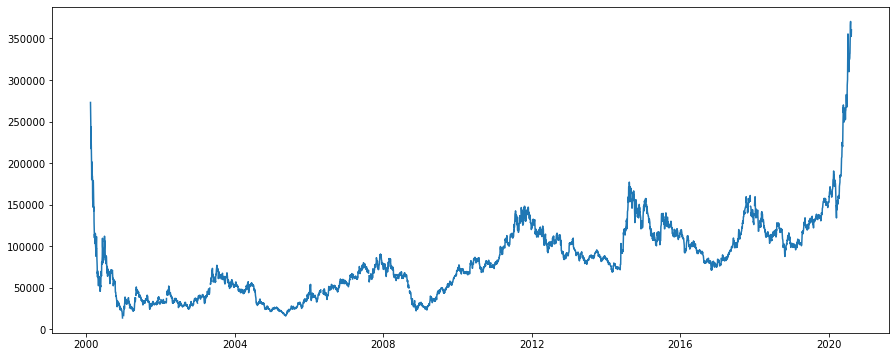

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

# time series 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts)

In [6]:
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Date
2000-12-25   NaN
2000-12-27   NaN
2000-12-28   NaN
2000-12-29   NaN
2001-01-01   NaN
              ..
2017-11-16   NaN
2017-11-23   NaN
2018-01-02   NaN
2018-11-15   NaN
2019-11-14   NaN
Name: Close, Length: 114, dtype: float64

In [7]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts=ts.interpolate(method='time')
ts[ts.isna()]    # 다시 NaN 확인

Series([], Name: Close, dtype: float64)

In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


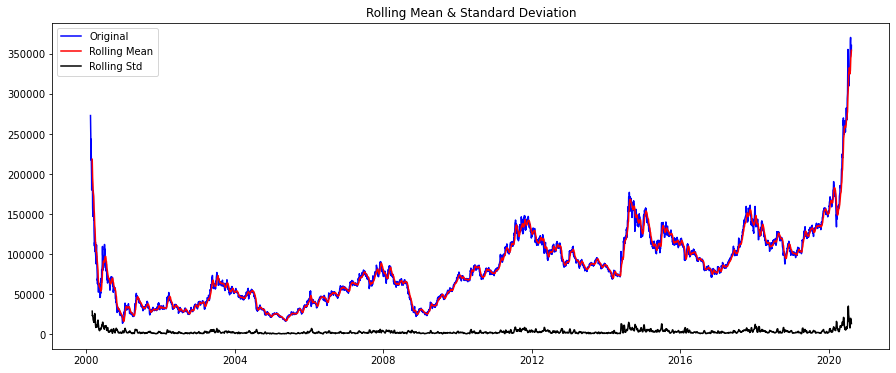

In [9]:
plot_rolling_statistics(ts, window=12)

In [10]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [11]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                    1.638336
p-value                           0.997968
#Lags Used                       33.000000
Number of Observations Used    5125.000000
Critical Value (1%)              -3.431627
Critical Value (5%)              -2.862104
Critical Value (10%)             -2.567070
dtype: float64


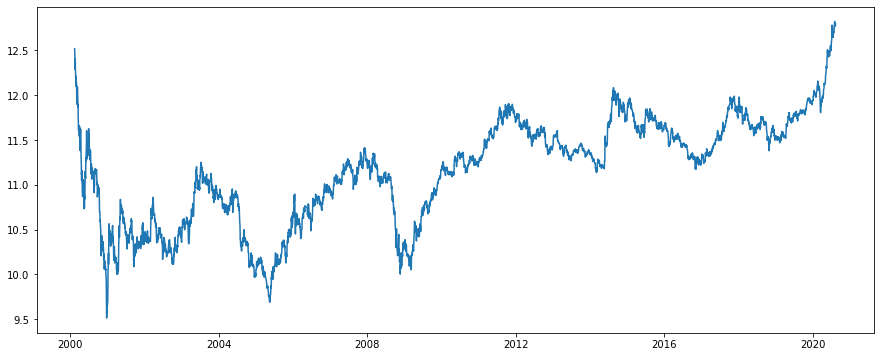

In [12]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [13]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -1.671834
p-value                           0.445680
#Lags Used                        5.000000
Number of Observations Used    5153.000000
Critical Value (1%)              -3.431620
Critical Value (5%)              -2.862101
Critical Value (10%)             -2.567069
dtype: float64


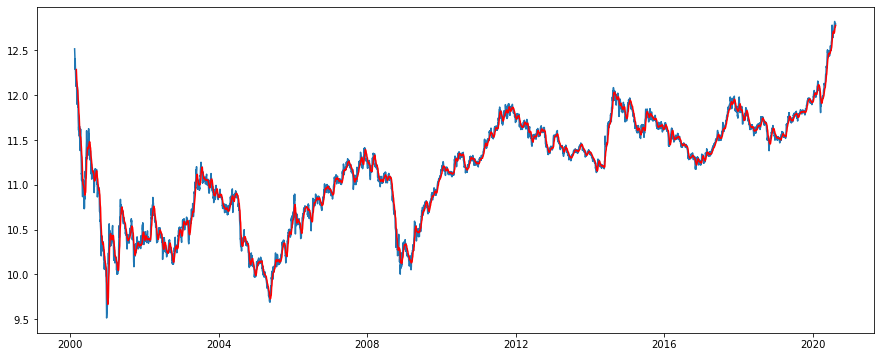

In [14]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average를 구해서 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [15]:
ts_log_moving_avg = ts_log - moving_avg
ts_log_moving_avg.head(15)

Date
2000-02-11         NaN
2000-02-14         NaN
2000-02-15         NaN
2000-02-16         NaN
2000-02-17         NaN
2000-02-18         NaN
2000-02-21         NaN
2000-02-22         NaN
2000-02-23         NaN
2000-02-24         NaN
2000-02-25         NaN
2000-02-28   -0.163485
2000-02-29   -0.130607
2000-03-01   -0.106070
2000-03-02   -0.114828
Name: Close, dtype: float64

In [16]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2000-02-28   -0.163485
2000-02-29   -0.130607
2000-03-01   -0.106070
2000-03-02   -0.114828
2000-03-03   -0.206365
2000-03-06   -0.236470
2000-03-07   -0.145423
2000-03-08   -0.098844
2000-03-09    0.020928
2000-03-10    0.011093
2000-03-13   -0.088016
2000-03-14   -0.137574
2000-03-15   -0.137108
2000-03-16   -0.087309
2000-03-17   -0.184790
Name: Close, dtype: float64

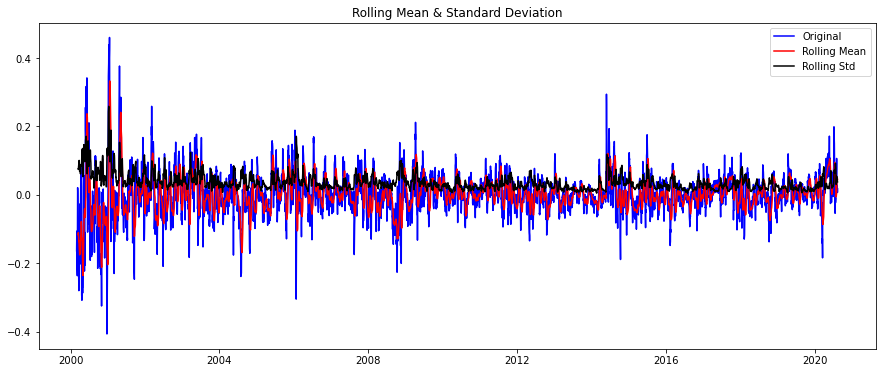

In [17]:
plot_rolling_statistics(ts_log_moving_avg)

In [18]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                -1.569219e+01
p-value                        1.429356e-28
#Lags Used                     1.300000e+01
Number of Observations Used    5.134000e+03
Critical Value (1%)           -3.431624e+00
Critical Value (5%)           -2.862103e+00
Critical Value (10%)          -2.567070e+00
dtype: float64


In [19]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

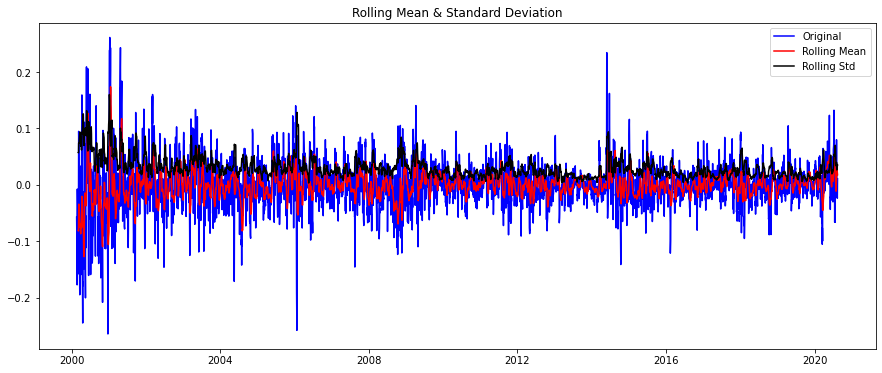

In [20]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [21]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -22.072543
p-value                           0.000000
#Lags Used                        6.000000
Number of Observations Used    5147.000000
Critical Value (1%)              -3.431621
Critical Value (5%)              -2.862102
Critical Value (10%)             -2.567069
dtype: float64


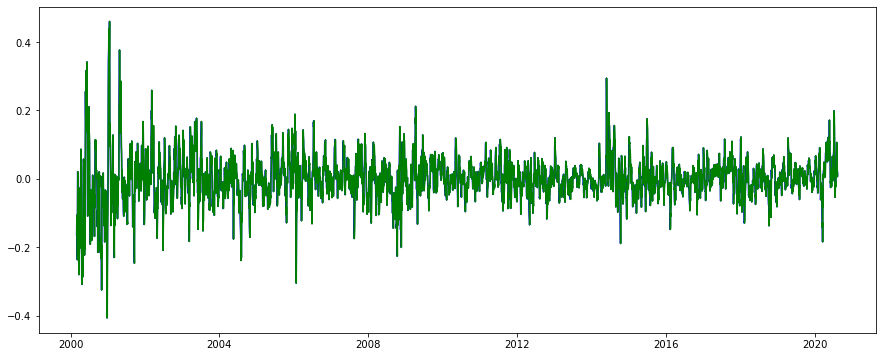

In [22]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

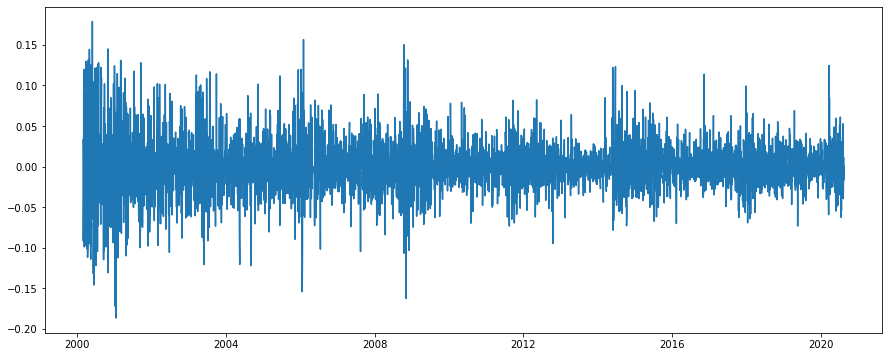

In [23]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

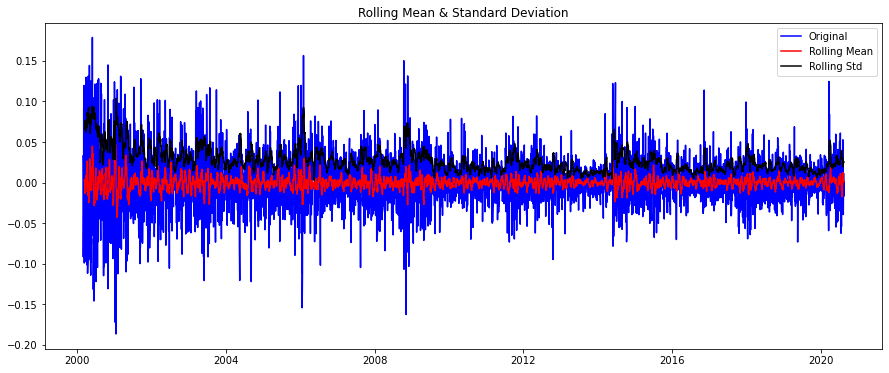

In [24]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [25]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.862764e+01
p-value                        2.058809e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.113000e+03
Critical Value (1%)           -3.431630e+00
Critical Value (5%)           -2.862105e+00
Critical Value (10%)          -2.567071e+00
dtype: float64


In [26]:
ts_log.head()

Date
2000-02-11    12.517227
2000-02-14    12.417144
2000-02-15    12.289954
2000-02-16    12.402872
2000-02-17    12.402872
Name: Close, dtype: float64

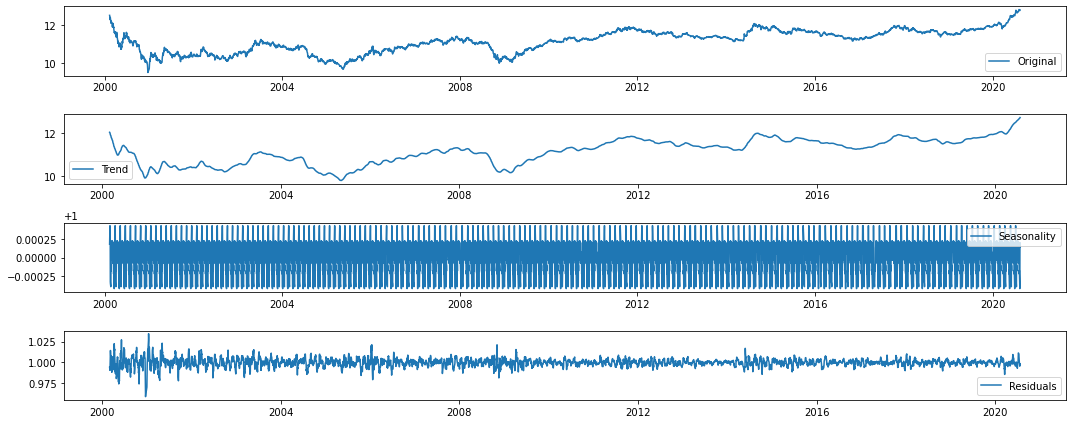

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


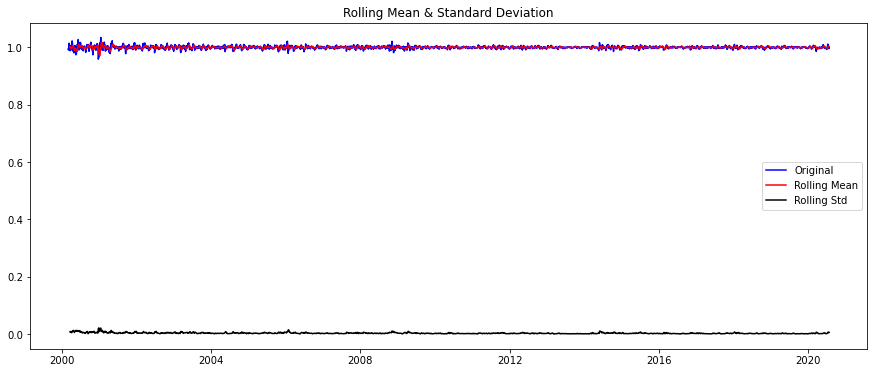

In [28]:
plot_rolling_statistics(residual)

In [29]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.770622e+01
p-value                        3.518811e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.095000e+03
Critical Value (1%)           -3.431634e+00
Critical Value (5%)           -2.862107e+00
Critical Value (10%)          -2.567072e+00
dtype: float64


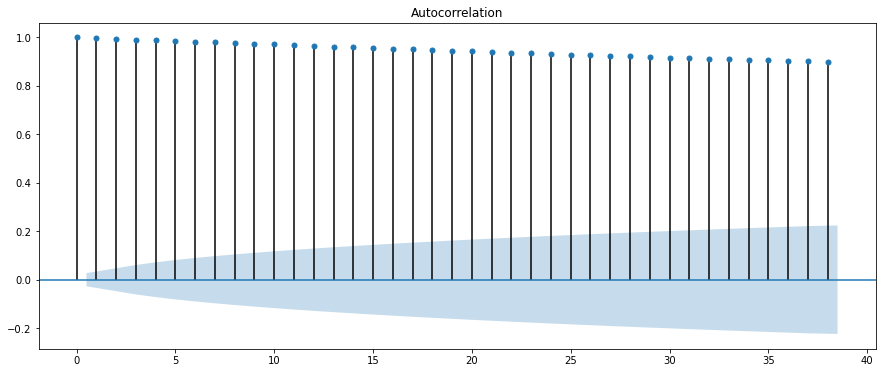

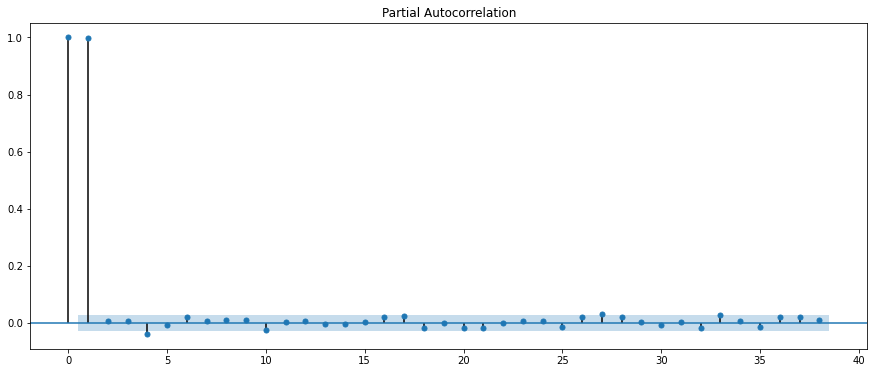

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -31.819284
p-value                           0.000000
#Lags Used                        4.000000
Number of Observations Used    5153.000000
Critical Value (1%)              -3.431620
Critical Value (5%)              -2.862101
Critical Value (10%)             -2.567069
dtype: float64


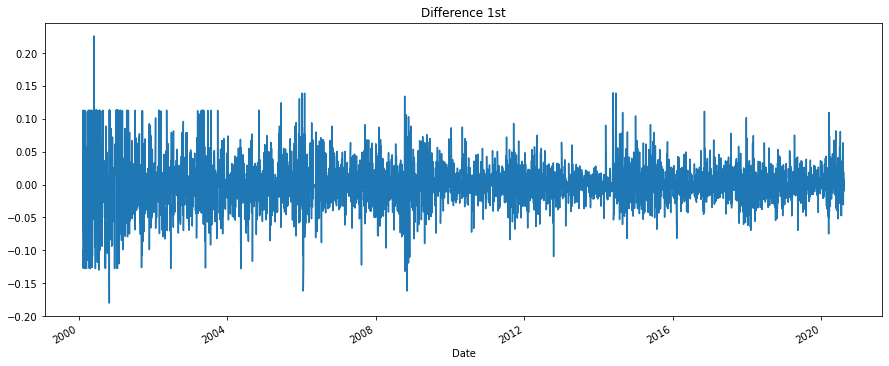

In [31]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                  -21.777999
p-value                           0.000000
#Lags Used                       31.000000
Number of Observations Used    5125.000000
Critical Value (1%)              -3.431627
Critical Value (5%)              -2.862104
Critical Value (10%)             -2.567070
dtype: float64


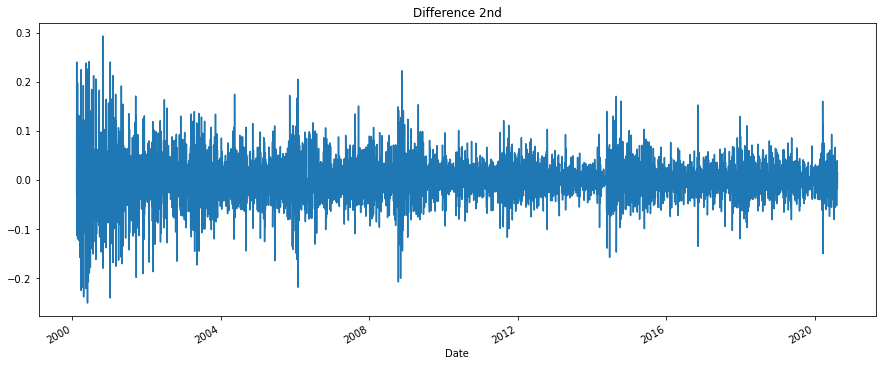

In [32]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

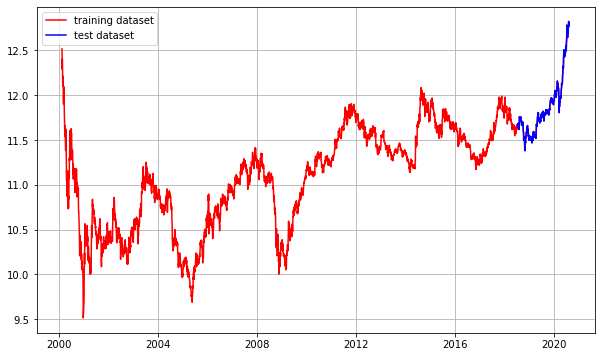

In [33]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [34]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2000-02-11    12.517227
2000-02-14    12.417144
Name: Close, dtype: float64
(4643,)
(516,)


In [35]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4642
Model:                 ARIMA(1, 1, 0)   Log Likelihood                9142.540
Method:                       css-mle   S.D. of innovations              0.034
Date:                Thu, 13 Aug 2020   AIC                         -18279.079
Time:                        16:21:09   BIC                         -18259.751
Sample:                             1   HQIC                        -18272.279
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.001     -0.365      0.715      -0.001       0.001
ar.L1.D.Close     0.0152      0.015      1.032      0.302      -0.014       0.044
                                    Root

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


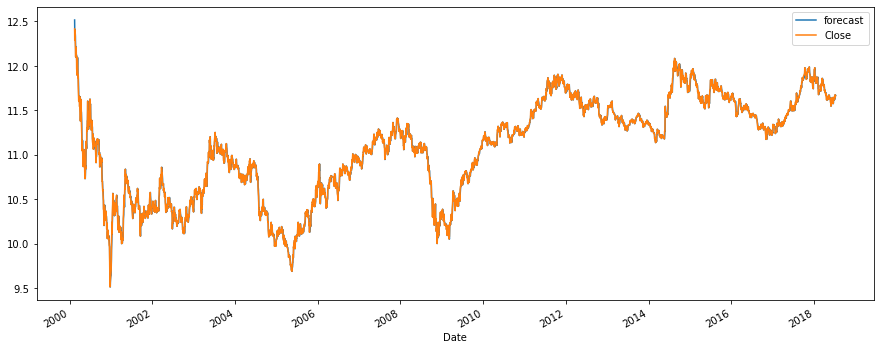

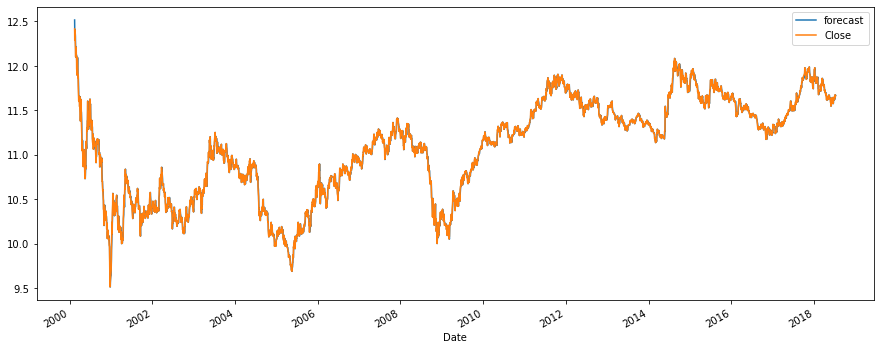

In [36]:
fitted_m.plot_predict()

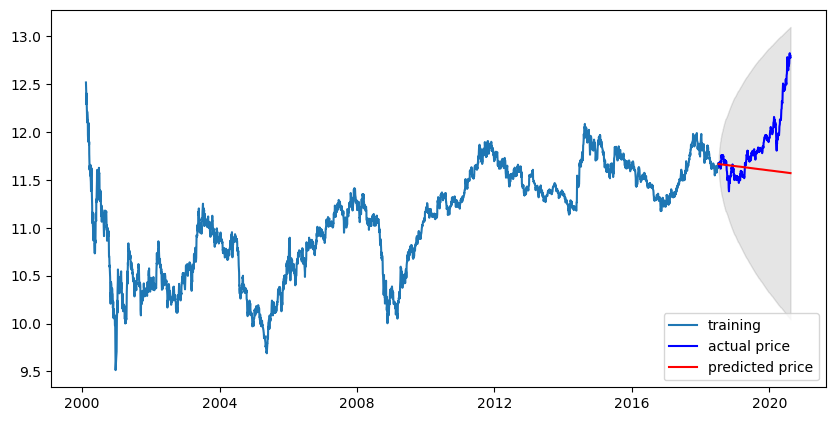

In [37]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  5747219941.850224
MAE:  46195.752925678804
RMSE:  75810.42106366527
MAPE: 23.32%
